In [1]:
import pandas as pd

In [3]:
df_calidad_aire = pd.read_csv('/content/AQI_traducido_completo.csv')

In [4]:
df_calidad_aire

,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,wind_speed,wind_direc,publishtime,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
0,Quilla,Ciudad de Keelung,38.0,NaN,bien,1.2,0.56,21.0,20.0,20.0,...,1.9,95,2025/04/29 08:00:00,0.2,9.2,20.0,1.0,121.760056,25.129167,1
1,Xizhi,Nueva ciudad de Taipei,58.0,Partículas suspendidas finas,común,0.5,0.35,13.0,10.0,30.0,...,1.3,11,2025/04/29 08:00:00,0.2,14.9,30.0,0.0,121.640810,25.066240,2
2,Wanli,Nueva ciudad de Taipei,40.0,NaN,bien,1.0,0.19,46.0,32.0,37.0,...,3.3,51,2025/04/29 08:00:00,0.1,9.2,24.0,0.0,121.689881,25.179667,3
3,Nueva tienda,Nueva ciudad de Taipei,58.0,Partículas suspendidas finas,común,1.0,0.42,28.0,39.0,24.0,...,0.5,192,2025/04/29 08:00:00,0.2,14.9,29.0,1.0,121.537778,24.977222,4
4,Tucheng,Nueva ciudad de Taipei,63.0,Partículas suspendidas finas,común,0.9,0.40,39.0,50.0,30.0,...,1.3,36,2025/04/29 08:00:00,0.2,16.8,32.0,0.0,121.451861,24.982528,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Pingtung (Ryukyu),Condado de Pingtung,69.0,Partículas suspendidas,común,1.1,0.25,56.0,54.0,50.0,...,0.8,153,2025/04/29 08:00:00,0.2,16.3,47.0,0.0,120.377220,22.352220,204
81,Ciudad de Taichung (Brigada de Bomberos del Di...,Ciudad de Taichung,33.0,NaN,bien,0.2,0.39,11.0,12.0,24.0,...,0.3,261,2025/04/29 08:00:00,0.2,7.5,20.0,0.0,120.883858,24.174592,310
82,Nuevo Taipei (Shulin),Nueva ciudad de Taipei,61.0,Partículas suspendidas finas,común,0.9,0.38,44.0,55.0,31.0,...,0.3,173,2025/04/29 08:00:00,0.2,16.0,32.0,0.0,121.383528,24.949028,311
83,Tainan (Nanhua),Ciudad de Tainan,59.0,Partículas suspendidas finas,común,0.9,0.35,21.0,9.0,24.0,...,3.7,111,2025/04/29 08:00:00,0.3,15.4,25.0,0.0,120.445832,23.045620,312


In [5]:
# Rellenar columna 'pollutant' con una etiqueta
df_calidad_aire['pollutant'].fillna('No especificado', inplace=True)

# Rellenar variables numéricas con la media
num_cols = ['so2', 'so2_avg', 'co', 'aqi', 'nox', 'co_8hr', 'o3', 'o3_8hr',
            'no2', 'pm2.5', 'no', 'pm10', 'pm10_avg', 'pm2.5_avg']
for col in num_cols:
    df_calidad_aire[col].fillna(df_calidad_aire[col].mean(), inplace=True)

# Rellenar variables categóricas con el valor más frecuente (modo)
cat_cols = ['status', 'wind_speed', 'wind_direc']
for col in cat_cols:
    df_calidad_aire[col].fillna(df_calidad_aire[col].mode()[0], inplace=True)

# Verificar que no haya valores nulos
print(df_calidad_aire.isnull().sum().sum())  # debería dar 0


0


<ipython-input-5-ba50853314b6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_calidad_aire['pollutant'].fillna('No especificado', inplace=True)
<ipython-input-5-ba50853314b6>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [6]:
df_calidad_aire

,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,wind_speed,wind_direc,publishtime,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
0,Quilla,Ciudad de Keelung,38.0,No especificado,bien,1.2,0.56,21.0,20.0,20.0,...,1.9,95,2025/04/29 08:00:00,0.2,9.2,20.0,1.0,121.760056,25.129167,1
1,Xizhi,Nueva ciudad de Taipei,58.0,Partículas suspendidas finas,común,0.5,0.35,13.0,10.0,30.0,...,1.3,11,2025/04/29 08:00:00,0.2,14.9,30.0,0.0,121.640810,25.066240,2
2,Wanli,Nueva ciudad de Taipei,40.0,No especificado,bien,1.0,0.19,46.0,32.0,37.0,...,3.3,51,2025/04/29 08:00:00,0.1,9.2,24.0,0.0,121.689881,25.179667,3
3,Nueva tienda,Nueva ciudad de Taipei,58.0,Partículas suspendidas finas,común,1.0,0.42,28.0,39.0,24.0,...,0.5,192,2025/04/29 08:00:00,0.2,14.9,29.0,1.0,121.537778,24.977222,4
4,Tucheng,Nueva ciudad de Taipei,63.0,Partículas suspendidas finas,común,0.9,0.40,39.0,50.0,30.0,...,1.3,36,2025/04/29 08:00:00,0.2,16.8,32.0,0.0,121.451861,24.982528,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Pingtung (Ryukyu),Condado de Pingtung,69.0,Partículas suspendidas,común,1.1,0.25,56.0,54.0,50.0,...,0.8,153,2025/04/29 08:00:00,0.2,16.3,47.0,0.0,120.377220,22.352220,204
81,Ciudad de Taichung (Brigada de Bomberos del Di...,Ciudad de Taichung,33.0,No especificado,bien,0.2,0.39,11.0,12.0,24.0,...,0.3,261,2025/04/29 08:00:00,0.2,7.5,20.0,0.0,120.883858,24.174592,310
82,Nuevo Taipei (Shulin),Nueva ciudad de Taipei,61.0,Partículas suspendidas finas,común,0.9,0.38,44.0,55.0,31.0,...,0.3,173,2025/04/29 08:00:00,0.2,16.0,32.0,0.0,121.383528,24.949028,311
83,Tainan (Nanhua),Ciudad de Tainan,59.0,Partículas suspendidas finas,común,0.9,0.35,21.0,9.0,24.0,...,3.7,111,2025/04/29 08:00:00,0.3,15.4,25.0,0.0,120.445832,23.045620,312


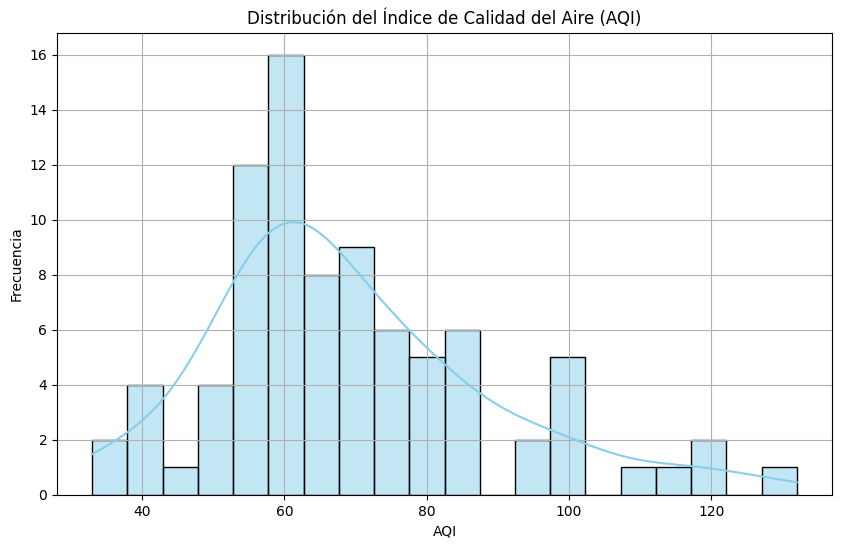

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df_calidad_aire['aqi'], bins=20, kde=True, color='skyblue')
plt.title('Distribución del Índice de Calidad del Aire (AQI)')
plt.xlabel('AQI')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [9]:
import pandas as pd

# Crear función para asignar categorías basadas en los valores de AQI
def categoria_aqi(aqi):
    if aqi <= 50:
        return 'Buena'
    elif aqi <= 100:
        return 'Moderada'
    elif aqi <= 150:
        return 'No saludable para grupos sensibles'
    elif aqi <= 200:
        return 'No saludable'
    elif aqi <= 300:
        return 'Muy no saludable'
    else:
        return 'Peligrosa'

# Asignar la categoría a cada valor de AQI en el dataset
df_calidad_aire['categoria_aqi'] = df_calidad_aire['aqi'].apply(categoria_aqi)

# Verificar los cambios
print(df_calidad_aire.head())


       sitename                  county   aqi                     pollutant  \
0        Quilla       Ciudad de Keelung  38.0               No especificado   
1         Xizhi  Nueva ciudad de Taipei  58.0  Partículas suspendidas finas   
2         Wanli  Nueva ciudad de Taipei  40.0               No especificado   
3  Nueva tienda  Nueva ciudad de Taipei  58.0  Partículas suspendidas finas   
4       Tucheng  Nueva ciudad de Taipei  63.0  Partículas suspendidas finas   

  status  so2    co    o3  o3_8hr  pm10  ...  wind_direc          publishtime  \
0   bien  1.2  0.56  21.0    20.0  20.0  ...          95  2025/04/29 08:00:00   
1  común  0.5  0.35  13.0    10.0  30.0  ...          11  2025/04/29 08:00:00   
2   bien  1.0  0.19  46.0    32.0  37.0  ...          51  2025/04/29 08:00:00   
3  común  1.0  0.42  28.0    39.0  24.0  ...         192  2025/04/29 08:00:00   
4  común  0.9  0.40  39.0    50.0  30.0  ...          36  2025/04/29 08:00:00   

   co_8hr  pm2.5_avg pm10_avg so2_avg 

In [10]:
# Ver distribución de las categorías de AQI
print(df_calidad_aire['categoria_aqi'].value_counts())


categoria_aqi
Moderada                              70
Buena                                  9
No saludable para grupos sensibles     6
Name: count, dtype: int64


<ipython-input-11-65e097221d6c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_calidad_aire, x='categoria_aqi', palette='Set2')


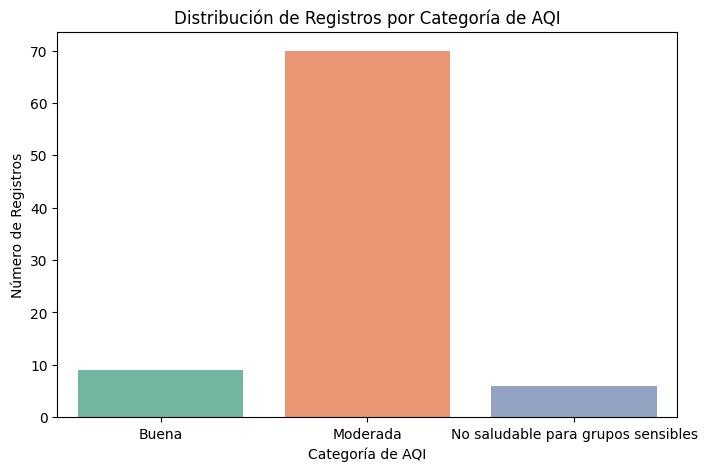

<ipython-input-11-65e097221d6c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_calidad_aire, x='categoria_aqi', y='aqi', palette='Set2')


Text(0.5, 0, 'Categoría de AQI')

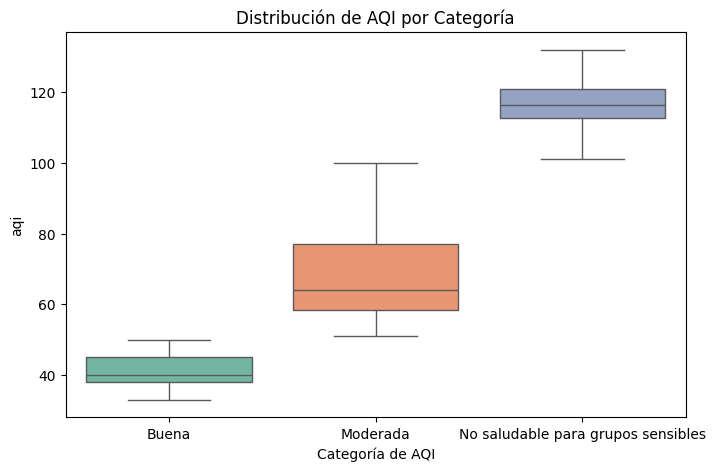

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras: categorías de AQI
plt.figure(figsize=(8, 5))
sns.countplot(data=df_calidad_aire, x='categoria_aqi', palette='Set2')
plt.title('Distribución de Registros por Categoría de AQI')
plt.xlabel('Categoría de AQI')
plt.ylabel('Número de Registros')
plt.show()

# Gráfico de boxplot: Distribución de AQI por categoría
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_calidad_aire, x='categoria_aqi', y='aqi', palette='Set2')
plt.title('Distribución de AQI por Categoría')
plt.xlabel('Categoría de AQI')


In [12]:
# Calculamos la correlación entre AQI y los contaminantes
correlacion = df_calidad_aire[['aqi', 'so2', 'co', 'no2', 'o3', 'pm2.5', 'pm10']].corr()
print(correlacion)


            aqi       so2        co       no2        o3     pm2.5      pm10
aqi    1.000000  0.283032 -0.019830 -0.030548  0.317944  0.513537  0.605097
so2    0.283032  1.000000  0.113787  0.226866  0.048130  0.551089  0.645745
co    -0.019830  0.113787  1.000000  0.852294 -0.555606  0.255646  0.144268
no2   -0.030548  0.226866  0.852294  1.000000 -0.485636  0.236098  0.181836
o3     0.317944  0.048130 -0.555606 -0.485636  1.000000 -0.288674  0.017340
pm2.5  0.513537  0.551089  0.255646  0.236098 -0.288674  1.000000  0.777431
pm10   0.605097  0.645745  0.144268  0.181836  0.017340  0.777431  1.000000


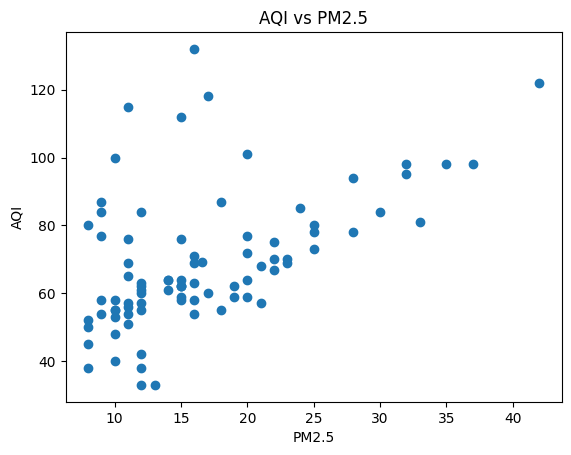

In [13]:
# Gráfico de dispersión para AQI vs. PM2.5
import matplotlib.pyplot as plt

plt.scatter(df_calidad_aire['pm2.5'], df_calidad_aire['aqi'])
plt.title('AQI vs PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.show()
